In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, InputLayer

import matplotlib.pyplot as plt
import numpy as np
# from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("full_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name_en                               1244 non-null   object 
 1   Nose_CenterShoulders_CenterHips       1244 non-null   float64
 2   LeftHip_LeftShoulder_LeftElbow        1244 non-null   float64
 3   RightHip_RightShoulder_RightElbow     1244 non-null   float64
 4   LeftShoulder_LeftElbow_LeftWrist      1244 non-null   float64
 5   RightShoulder_RightElbow_RightWrist   1244 non-null   float64
 6   LeftShoulder_CenterShoulders_Nose     1244 non-null   float64
 7   RightShoulder_CenterShoulders_Nose    1244 non-null   float64
 8   LeftIndex1_LeftWrist_LeftElbow        1244 non-null   float64
 9   RightIndex1_RightWrist_RightElbow     1244 non-null   float64
 10  LeftShoulder_LeftHip_LeftKnee         1244 non-null   float64
 11  RightShoulder_Rig

In [3]:
X = df.iloc[:, 1:].to_numpy()
y = df["name_en"]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

print(len(pd.unique(encoded_y)))
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

X_train, X_test, y_train, y_test = train_test_split(
    X, dummy_y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, y_train.shape

12


((995, 17), (995, 12))

In [4]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(InputLayer(input_shape=(X.shape[1])))  # dimensions of X_train
    model.add(Dense(32, activation="relu"))
    model.add(Dense(12, activation="softmax"))

    # compile model
    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )
    return model


model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                396       
Total params: 972
Trainable params: 972
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(X_train, y_train, batch_size=5, epochs=25)

Epoch 1/25
199/199 [==============================] - 12s 1ms/step - loss: 53.9204 - accuracy: 0.1834
Epoch 2/25
199/199 [==============================] - 0s 939us/step - loss: 7.2258 - accuracy: 0.5191
Epoch 3/25
199/199 [==============================] - 0s 997us/step - loss: 4.1906 - accuracy: 0.6612
Epoch 4/25
199/199 [==============================] - 0s 979us/step - loss: 2.9228 - accuracy: 0.7032
Epoch 5/25
199/199 [==============================] - 0s 886us/step - loss: 2.5147 - accuracy: 0.7413
Epoch 6/25
199/199 [==============================] - 0s 998us/step - loss: 1.6849 - accuracy: 0.8013
Epoch 7/25
199/199 [==============================] - 0s 993us/step - loss: 1.5074 - accuracy: 0.7939
Epoch 8/25
199/199 [==============================] - 0s 968us/step - loss: 1.1680 - accuracy: 0.82940s - loss: 1.1360 - accuracy: 0.83
Epoch 9/25
199/199 [==============================] - 0s 989us/step - loss: 1.1268 - accuracy: 0.8330
Epoch 10/25
199/199 [===========================

In [6]:
model.predict_proba(X_test)

/home/bram/.pyenv/versions/3.9.4/envs/cv/lib/python3.9/site-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[4.8000494e-30, 5.7536572e-15, 6.1524349e-16, ..., 1.7578576e-12,
        5.6766306e-16, 5.9258679e-15],
       [0.0000000e+00, 1.2235707e-01, 2.1069364e-22, ..., 8.6854045e-21,
        4.4156410e-14, 1.2764751e-06],
       [3.2231610e-11, 3.5250254e-30, 0.0000000e+00, ..., 3.6484314e-13,
        5.0980281e-13, 0.0000000e+00],
       ...,
       [1.3584231e-15, 8.6470721e-20, 4.3447720e-27, ..., 3.5857975e-17,
        9.0187021e-13, 1.8766859e-34],
       [3.0851472e-19, 9.1912081e-19, 5.0521717e-24, ..., 3.0384867e-19,
        4.1925704e-16, 1.2360357e-23],
       [6.6553128e-18, 1.6005630e-25, 4.9021622e-23, ..., 1.9708397e-08,
        9.9998546e-01, 1.7533816e-24]], dtype=float32)

In [7]:
predictions = model.predict_classes(X_test)
predictions_decoded = encoder.inverse_transform(predictions)

y_test_decoded=encoder.inverse_transform([np.where(x==1)[0][0] for x in y_test])

for x in zip(predictions_decoded, y_test_decoded): 
    print (x)

('Half Splits Pose', 'Half Splits Pose')
('Upward-Facing Dog', 'Upward-Facing Dog')
('Easy Pose', 'Easy Pose')
("Child's pose", "Child's pose")
('Half Splits Pose', 'Half Splits Pose')
('Cobra Pose', 'Cobra Pose')
('cat pose', 'cat pose')
('Low Lunge', 'Low Lunge')
('Easy Pose', 'Easy Pose')
('Downward-facing Dog', 'Downward-facing Dog')
('Downward-facing Dog', 'Downward-facing Dog')
('cat pose', 'cat pose')
('cow pose', 'cow pose')
('Upward-Facing Dog', 'Upward-Facing Dog')
('Half Splits Pose', 'Low Lunge')
("Child's pose", "Child's pose")
('Easy Pose', 'Easy Pose')
('Half Splits Pose', 'Half Splits Pose')
("Happy Baby's pose", "Happy Baby's pose")
('cat pose', 'cat pose')
('Upward-Facing Dog', 'Upward-Facing Dog')
('Downward-facing Dog', 'Downward-facing Dog')
('high plank', 'high plank')
("Child's pose", 'Low Lunge')
('cow pose', 'cow pose')
('Easy Pose', 'Easy Pose')
('Downward-facing Dog', 'Downward-facing Dog')
("Happy Baby's pose", "Happy Baby's pose")
("Happy Baby's pose", "Hap

/home/bram/.pyenv/versions/3.9.4/envs/cv/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


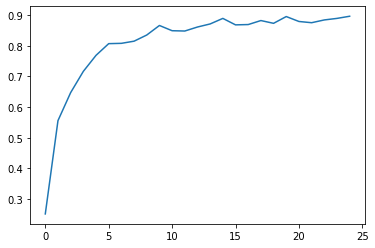

In [8]:
plt.plot(history.history["accuracy"])


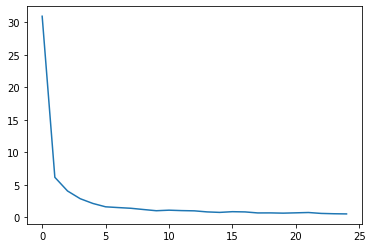

In [9]:
plt.plot(history.history["loss"])

In [41]:
model.save('NN_model')

INFO:tensorflow:Assets written to: NN_model/assets


In [13]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test_decoded,predictions_decoded,))

                       precision    recall  f1-score   support

         Child's pose       0.89      1.00      0.94        17
           Cobra Pose       0.83      0.53      0.65        19
  Downward-facing Dog       0.84      1.00      0.91        21
            Easy Pose       1.00      1.00      1.00        27
     Half Splits Pose       0.83      0.89      0.86        27
    Happy Baby's pose       0.94      0.94      0.94        16
            Low Lunge       0.96      0.86      0.91        28
Standing Forward Bend       1.00      0.76      0.86        21
    Upward-Facing Dog       0.59      0.76      0.67        21
             cat pose       0.94      0.94      0.94        16
             cow pose       0.92      0.92      0.92        24
           high plank       0.92      1.00      0.96        12

             accuracy                           0.88       249
            macro avg       0.89      0.88      0.88       249
         weighted avg       0.89      0.88      0.88 